In [ ]:
import pandas as pd
df = pd.read_csv('Stores.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [ ]:
df.columns # listing all column names

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [ ]:
df.shape # csv has 896 rows and 5 columns

(896, 5)

In [ ]:
df['Store_Sales'].idxmax() # finding the max sales from Store_Sales column 

649

In [ ]:
df.iloc[648] # numbering for Store ID 649 is 648 

Store ID                  649
Store_Area               1514
Items_Available          1794
Daily_Customer_Count     1400
Store_Sales             54820
Name: 648, dtype: int64

In [ ]:
df['Store_Sales'].idxmin()

31

In [ ]:
df.iloc[30]

Store ID                   31
Store_Area               1439
Items_Available          1746
Daily_Customer_Count      990
Store_Sales             80140
Name: 30, dtype: int64

In [ ]:
df = df.drop("Store ID ", axis ="columns")

In [ ]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [ ]:
df.duplicated().sum() # checking for duplicated values
df.isna().sum()       # checking for NaN values

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [ ]:
df.describe() # for numerical summary 

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [ ]:
df.corr()['Store_Sales'].sort_values() 
# could see the correlation values are poor
# strong correlation: between ± 0.50 and ± 1
# moderate correlation: between ± 0.30 and ± 0.49
# weak correlation: below 0.29
# difficult to build effective machine learning model with weak correlation values

Daily_Customer_Count    0.008629
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

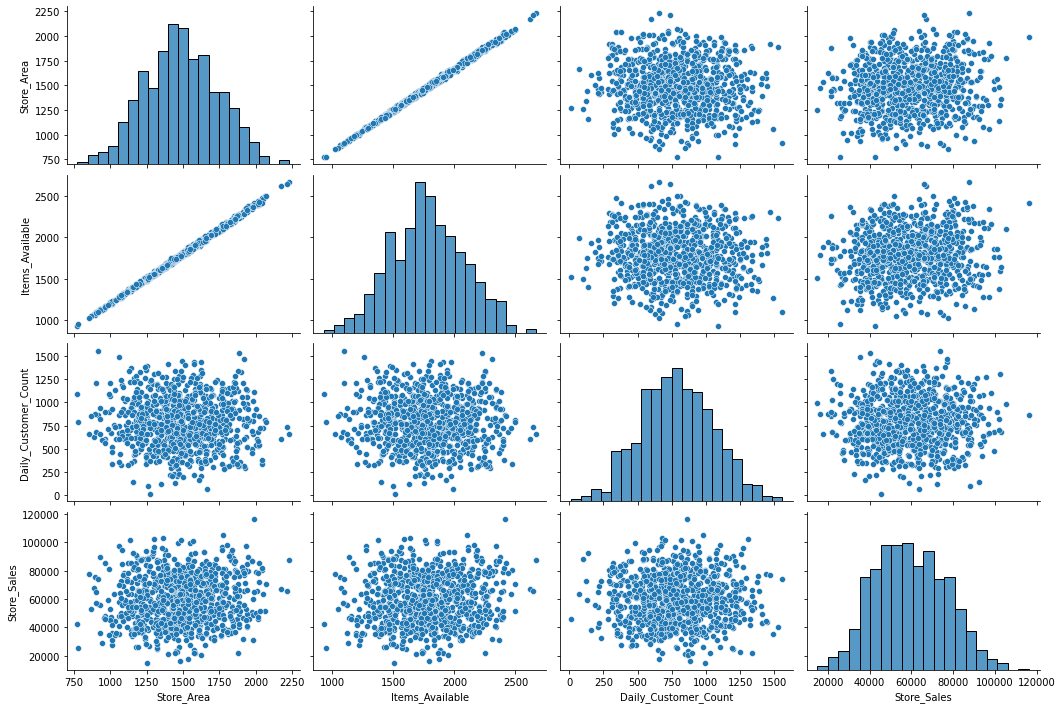

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  # library needed to make data visual
sns.pairplot(df, aspect = 1.5) # "pairplot" is like heatmap in seaborn
plt.show()

<Figure size 4000x2000 with 0 Axes>

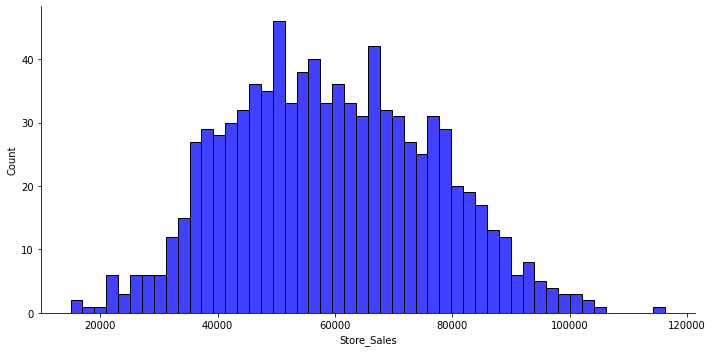

In [ ]:
plt.figure(figsize = (20,10), dpi = 200)
sns.displot(data=df, x = "Store_Sales", bins = 50, color = "b", aspect = 2)

In [ ]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [ ]:
import numpy as np

In [ ]:
# daily customer count goes from 10 to 1560 --> remove outliers first
IQRDailyCustomerCount = 970 - 600
upperlim = 970 + 1.5 * IQRDailyCustomerCount
lowerlim = 600 - 1.5 * IQRDailyCustomerCount
df.loc[df["Daily_Customer_Count"] > upperlim] = np.nan
df.loc[df["Daily_Customer_Count"] < lowerlim] = np.nan


In [ ]:
df = df.dropna()

In [ ]:
x = df[["Store_Area", "Items_Available", "Daily_Customer_Count"]] # x = df[[ ]]?
y = df["Store_Sales"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=100, test_size = 0.3) # fixed value assigned to random_state = 0, 1, or any other integer 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train) # fit_transform(): Fit to data, then transform it.
scaled_x_test = scaler.fit_transform(x_test)

In [ ]:
#-----feature engineering----

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
def modelresults(predictions):
  print("Mean absolute error is {}".format(mean_absolute_error(y_test, predictions))) # indentation needed 
  print("Mean squared error is {}".format(np.sqrt(mean_squared_error(y_test, predictions)))) # indentation needed

In [ ]:
#-----machine learning----

In [ ]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(scaled_x_train, y_train)
predictionslr = lr.predict(scaled_x_test)
modelresults(predictionslr)                # running linear regression

Mean absolute error is 14349.998699736743
Mean squared error is 17337.59686115813


In [ ]:
# great errors show that linear regression model does not fit for this dataset